<a href="https://colab.research.google.com/github/tarunn107/UnsupervisedML/blob/main/EDA_Global_Terrorism_Tarun_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - EDA on Global Terrorism Dataset



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name              -**     Tarun Suriyakumar


# **Project Summary -**

In this EDA project, we attempt to get insights from The Global Terrorism Database. The database has information about more than 180,000 terrorist attacks around the world from 1970 through 2017. The database has detailed information about the attack such as attacker, target, latitude and longitude of attack and so on. We initially try to create a Dataframe with just the data which we will need for analysis, we check the data for missing variables and proceed to find insights. We will use numpy for mathematical calculations, Pandas for Dataframe manipulation and Seaborn and matplotlib for visualization. We try to arrive at conclusions to reduce the number and impact of terrorist attacks by analysing the attacks in this Database.

# **GitHub Link -**

[https://github.com/tarunn107/EDA](https://github.com/tarunn107/EDA)

# **Problem Statement**


To perform Exploratory Data Analysis on the Global Terrorism Dataset by identifying hot zones of terrorism,variation of number of attacks through the years, most used method of terror and most affected targets, finding the relation between the provided variables to build a visualization platform for understanding patterns and regularities of the attacks.

#### **Define Your  Objective?**

Visualizing the trend of attacks that have happened so far,weapon usage, areas prone to attack, targets prone to attack, to obtain insights for reducing terrorism in future.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing numpy for mathematical operations, pandas for dataframe manipulation, seaborn and matplotlib for visualization, missingno for null value visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Santa/GlobalTerrorismData.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Dataset First View

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

From the first view of the dataset, we can see that it has a large number of columns, so next we find the exact shape.

### Dataset Rows & Columns count

In [ ]:
print('Number of rows,columns is',df.shape)
print('Total number of elements is',df.size)

Number of rows,columns is (181691, 135)
Total number of elements is 24528285


The data set has 181691 rows and 135 columns.

### Dataset Information

We take a look at the types of columns in the dataset

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

The dataset has 0 duplicate values

#### Missing Values/Null Values

Now we try to deal with the missing/null values in the data set.

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

13853997

There's a total of 13853997 null values.
For better visualization of null values we use missingno library to visualize null values as a bar graph.

<AxesSubplot:>

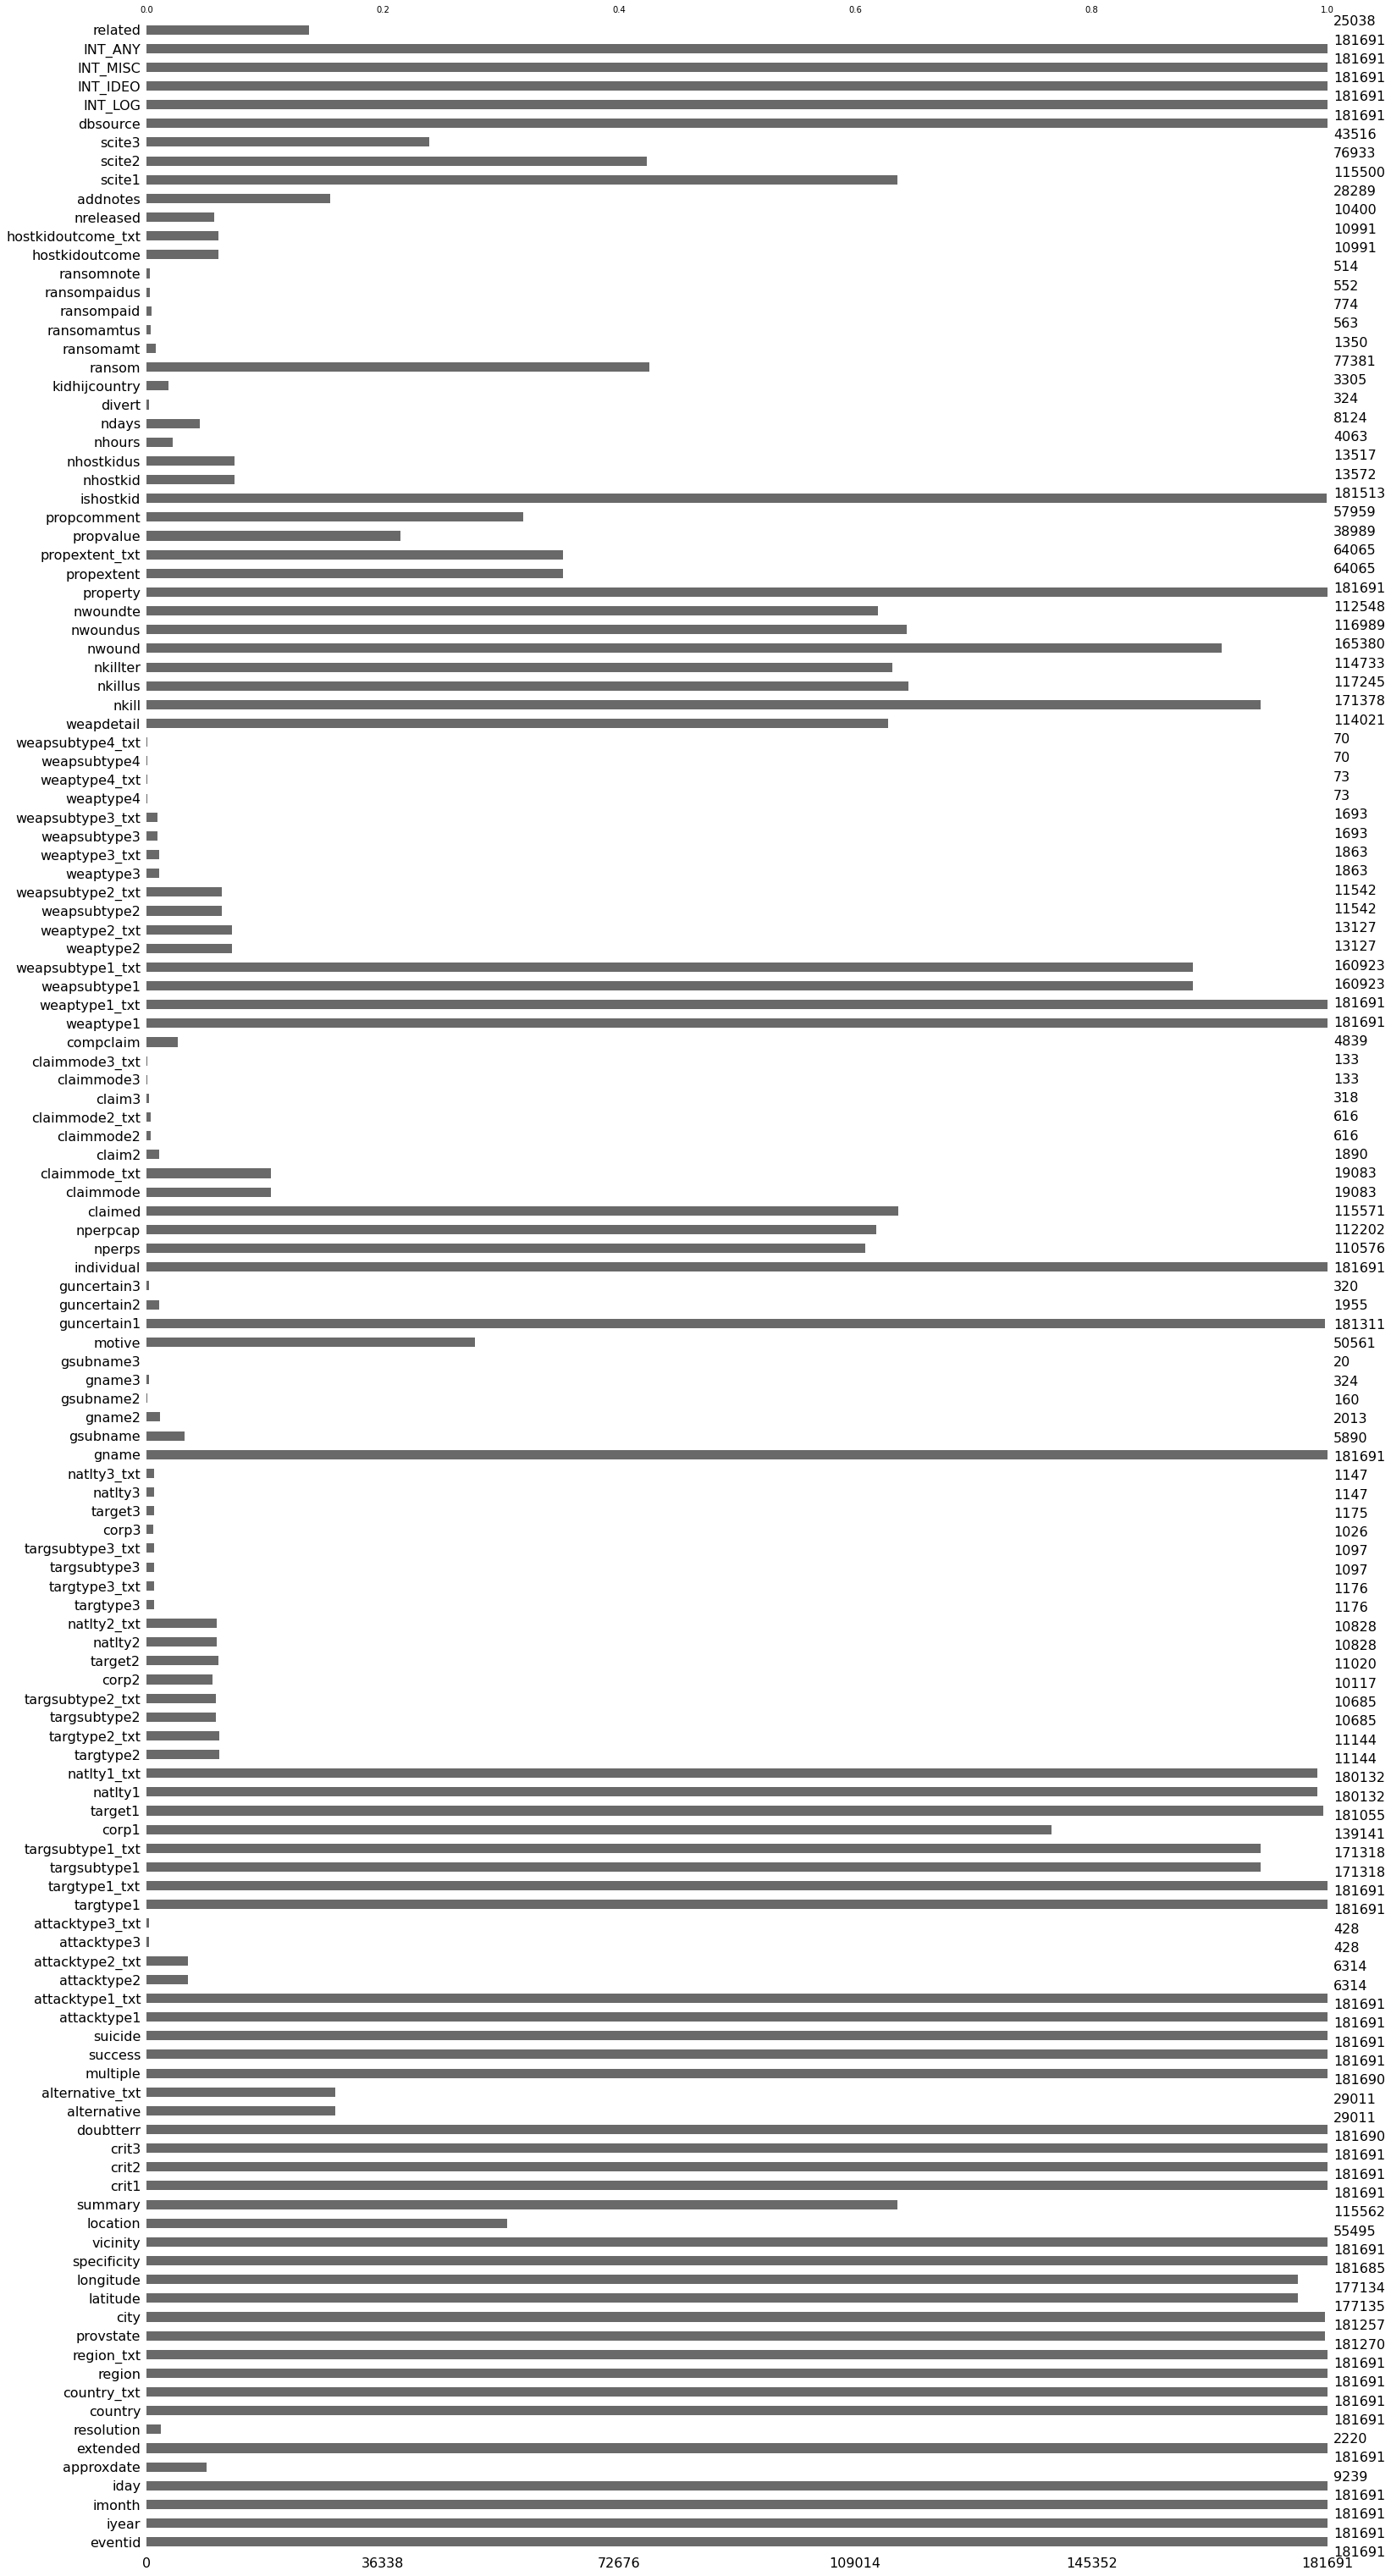

In [ ]:
# Visualizing the missing values
msno.bar(df)


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

### What did you know about your dataset?

1.   Contains 135 columns and 181691 rows.
2.   Contains information of terror attacks from 1970 to 2017
3.   Contains 13853997 null values


The dataset contains a large number of columns, most of which will not be needed for our analysis. So, we create a new sub dataframe with the columns which are relevant for our analysis.

In [ ]:
#Creating sub Dataframe and renaming column names as shown below
df1=pd.DataFrame(df[['iyear','imonth','iday','region_txt','country_txt','city','attacktype1_txt','success','suicide','targtype1_txt','weaptype1_txt','targsubtype1_txt','gname','nkill','nwound']])
df1.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region_txt':'region','nwound':'wounded','nkill':'killed','country_txt':'country','attacktype1_txt':'type_of_attack','weaptype1_txt':'weapon','targtype1_txt':'target','targsubtype1_txt':'target_subtype','gname':'attacker'}, inplace = True)
df1.head()

,year,month,day,region,country,city,type_of_attack,success,suicide,target,weapon,target_subtype,attacker,killed,wounded
0,1970,7,2,Central America & Caribbean,Dominican Republic,Santo Domingo,Assassination,1,0,Private Citizens & Property,Unknown,Named Civilian,MANO-D,1.0,0.0
1,1970,0,0,North America,Mexico,Mexico city,Hostage Taking (Kidnapping),1,0,Government (Diplomatic),Unknown,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,0.0,0.0
2,1970,1,0,Southeast Asia,Philippines,Unknown,Assassination,1,0,Journalists & Media,Unknown,Radio Journalist/Staff/Facility,Unknown,1.0,0.0
3,1970,1,0,Western Europe,Greece,Athens,Bombing/Explosion,1,0,Government (Diplomatic),Explosives,Embassy/Consulate,Unknown,NaN,NaN
4,1970,1,0,East Asia,Japan,Fukouka,Facility/Infrastructure Attack,1,0,Government (Diplomatic),Incendiary,Embassy/Consulate,Unknown,NaN,NaN


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['year', 'month', 'day', 'region', 'country', 'city', 'type_of_attack',
       'success', 'suicide', 'target', 'weapon', 'target_subtype', 'attacker',
       'killed', 'wounded'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()

,year,month,day,success,suicide,killed,wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,0.036507,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,0.187549,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1570.000000,8191.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            181691 non-null  int64  
 1   month           181691 non-null  int64  
 2   day             181691 non-null  int64  
 3   region          181691 non-null  object 
 4   country         181691 non-null  object 
 5   city            181257 non-null  object 
 6   type_of_attack  181691 non-null  object 
 7   success         181691 non-null  int64  
 8   suicide         181691 non-null  int64  
 9   target          181691 non-null  object 
 10  weapon          181691 non-null  object 
 11  target_subtype  171318 non-null  object 
 12  attacker        181691 non-null  object 
 13  killed          171378 non-null  float64
 14  wounded         165380 non-null  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 20.8+ MB


We notice a few missing values in some of the columns. These values will be dealt with in the next section.

### Variables Description


* year, month, day: Represent date of attack

* success, suicide: 1 denotes success of terrorist mission,    suicide committed. 0 denotes failure,suicide not committed respectively.

* country, city and region of attack are mentioned in their respective columns

* type_of_attack represents the type of terrorist attack. (example:   Assasination, Bombing/Explosion)
*target,target_subtype column contains the name of target organisation and its type
*attacker column contains the name of the terrorist group
*killed,wounded shows the number of people killed and wounded respectively.







### Check Unique Values for each variable.

In [ ]:
df1.nunique()

year                 47
month                13
day                  32
region               12
country             205
city              36674
type_of_attack        9
success               2
suicide               2
target               22
weapon               12
target_subtype      112
attacker           3537
killed              205
wounded             238
dtype: int64

In [ ]:
print(df1['suicide'].unique())

[0 1]


In fields having just 2 values, 0 denotes failure and 1 denotes success.

--------------------------------------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

###Dealing with missing values as shown below.
###Creating a new column 'casualties' as sum of 'wounded' and 'killed'.

In [ ]:
#Creating a new column 'casualties' as sum of 'wounded' and 'killed'.
df1['wounded'] = df1['wounded'].fillna(0).astype(int)
df1['killed'] = df1['killed'].fillna(0).astype(int)
df1['casualities']=df1['wounded']+df1['killed']
df1['target_subtype']=df1['target_subtype'].fillna('Other')
df1['city']=df1['city'].fillna('Unknown')
#sum of null values
df1.isnull().sum()

year              0
month             0
day               0
region            0
country           0
city              0
type_of_attack    0
success           0
suicide           0
target            0
weapon            0
target_subtype    0
attacker          0
killed            0
wounded           0
casualities       0
dtype: int64

We have 0 null values in the dataframe

###Finding the Most Attacked Country

In [ ]:
#Country with the most attacks.
country=df1['country'].value_counts().to_frame()
country.rename(columns = {'country':'attacks'}, inplace = True)
country

,attacks
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
...,...
International,1
Wallis and Futuna,1
South Vietnam,1
Andorra,1





*  Iraq is the most attacked country.





--------------------------------------------------------------------------------


###Finding the Most Attacked City

In [ ]:
#City with the most attacks. Excluding 'Unknown' values using drop method.
city=df1['city'].value_counts().to_frame()
city.drop(index=city.index[0], axis=0, inplace=True)
city.rename(columns = {'city':'attacks'}, inplace = True)
city

,attacks
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
...,...
Hotwag,1
Ostend,1
Balughata,1
Jikoyi,1






*   Baghdad is the most attacked city






--------------------------------------------------------------------------------


###Finding the countries with highest number of Ransom Incidents

In [ ]:
#creating sub dataframe from main dataframe for ransom information
df2=pd.DataFrame(df[['country_txt','city','ransompaid']])
df2.rename(columns = {'country_txt':'country'}, inplace = True)
#filling null values with 0, replacing -99 with 0
df2= df2.dropna()
df2['ransompaid'] = pd.DataFrame(df2['ransompaid'].replace([-99], np.nan))
df2['ransompaid'] = pd.DataFrame(df2['ransompaid'].replace([0], np.nan))
df2= df2.dropna()
#sum gives total amount, count gives number of attacks
a=(df2.groupby(['country'])['ransompaid'].sum())
b=(df2.groupby(['country'])['ransompaid'].count())
df3= pd.merge(a, b, right_index = True,left_index = True)
df3.rename(columns={'ransompaid_x':'ransom sum','ransompaid_y':'number of ransom attacks'},inplace=True)
df3 = df3.astype({"ransom sum": int})
df3.sort_values(by=['number of ransom attacks'],ascending=False, inplace=True)
df3.reset_index(inplace=True)
df3.head()


,country,ransom sum,number of ransom attacks
0,Philippines,4119252,35
1,Colombia,4520217,19
2,Mexico,35740999,16
3,Nigeria,14932631,12
4,Argentina,81950000,11


Phillipines is the country with the most number of ransom attacks which succeeded.

--------------------------------------------------------------------------------


###Identifying the incident with Highest Ransom Paid

In [ ]:
#highest ransom incident
df2.loc[df2['ransompaid']==df2['ransompaid'].max()]


,country,city,ransompaid
156624,Iraq,Al-Basiyah,275000000.0


--------------------------------------------------------------------------------


###Identifying Countries with the most Kidnap Operations

In [ ]:
#creating sub dataframe from main dataframe for kidnap information
df4=pd.DataFrame(df[['country_txt','nhostkid']])
df4.rename(columns = {'country_txt':'country','nhostkid':'kidnap operations'}, inplace = True)
df4['kidnap operations'] = df4['kidnap operations'].replace([-99], np.nan)
df4['kidnap operations'] = df4['kidnap operations'].replace([0], np.nan)
df4= df4.dropna()
#sum gives total people kidanpped, count gives number of attacks
a=(df4.groupby(['country'])['kidnap operations'].sum())
b=(df4.groupby(['country'])['kidnap operations'].count())
df5= pd.merge(b, a, right_index = True,left_index = True)
df5.rename(columns={'kidnap operations_x':'kidnap operations','kidnap operations_y':'number of people kidnapped'},inplace=True)
df5 = df5.astype({'number of people kidnapped': int})
df5.sort_values(by=['kidnap operations'],ascending=False, inplace=True)
df5.reset_index(inplace=True)
df5.head()


,country,kidnap operations,number of people kidnapped
0,India,1333,7515
1,Colombia,1161,8408
2,Afghanistan,1096,7035
3,Iraq,952,27483
4,Pakistan,866,8708


India is the country with the most kidnapping operations.





--------------------------------------------------------------------------------


### Identifying the terorrist groups with the most number of attacks





In [ ]:
#counting occurence of each attacker name in the column using value counts
df1['attacker'].value_counts()
top_attackers=pd.DataFrame(df1['attacker'].value_counts().reset_index())
top_attackers.columns=['organistation','number_of_attacks']
top_attackers.drop(index=top_attackers.index[0], axis=0, inplace=True)

top_attackers.head(6)

,organistation,number_of_attacks
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772


Taliban is the terrorist group with Most number of Attacks.

--------------------------------------------------------------------------------


Terrorist group with most suicide attacks

In [ ]:
#Creating suicide df to find the attacker with most suicide operations
suicide=df1[df1['suicide']==1]
suicide['attacker'].value_counts().drop('Unknown')

Islamic State of Iraq and the Levant (ISIL)    1305
Taliban                                         708
Boko Haram                                      443
Tehrik-i-Taliban Pakistan (TTP)                 177
Al-Shabaab                                      174
                                               ... 
Algerian Islamic Extremists                       1
Neo-Fascists                                      1
Harkatul Jihad-e-Islami                           1
Mujahideen Youth Movement (MYM)                   1
White extremists                                  1
Name: attacker, Length: 176, dtype: int64

ISIL has carried out the most suicide operations- 1305

--------------------------------------------------------------------------------


###Finding the Most Preferred method of Attack by Terrorists

In [ ]:
df1['type_of_attack'].value_counts()/df1.shape[0]*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: type_of_attack, dtype: float64

Bombs and Explosives are the most used method of attack for terrorists


--------------------------------------------------------------------------------


###Checking the number of casualties in claimed and unclaimed attacks.

In [ ]:
#creating df claimed to find sum of casualities
claimed=pd.DataFrame(df[df['claimed']==1])
claimed['casualities']=df['nwound']+df['nkill']
#creating df unclaimed to find sum of casualities
unclaimed=pd.DataFrame(df[df['claimed']==0])
unclaimed['casualities']=df['nwound']+df['nkill']
print('Casualties in claimed attacks is',claimed['casualities'].sum())
print('Casualties in unclaimed attacks is',unclaimed['casualities'].sum())



Casualties in claimed attacks is 194605.0
Casualties in unclaimed attacks is 421867.0


From the above code, we can arrive at the conclusion that unclaimed attacks result in more casualties.

--------------------------------------------------------------------------------


###Analysing Attacks By Student Radicals

In [ ]:
#normalising value counts to get percentage
df1.loc[df1['attacker']=='Student Radicals']['country'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


United States    95.9%
South Korea       4.1%
Name: country, dtype: object

In [ ]:
df1.loc[df1['attacker']=='Student Radicals']['year'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'



1970    73.0%
1971    17.6%
1972     5.4%
1986     1.4%
1992     1.4%
1995     1.4%
Name: year, dtype: object

95.9 percent of Student Radicals are from the US and 73 percent of the attacks happened in 1970



--------------------------------------------------------------------------------


### What all manipulations have you done and insights you found?



*  Created a new column 'casualties' as sum of 'wounded' and 'killed'
*  Iraq is the most attacked country.
*   Baghdad is the most attacked city
*  Phillipines is the country with the most number of ransom attacks which succeeded.
*   $275000000 was the highest ransom paid in a ransom attack. Al-Basiyah
*   India is the country with the most kidnapping operations. 7515 people kidnapped.

*   Taliban is the terrorist group with Most number of Attacks.
* ISIL has carried out the most suicide operations- 1305
*   Bombs and Explosives are the most used method of attack for terrorists
*   Unclaimed attacks result in more casualties compared to claimed attacks
*   95.9 percent of Student Radicals are from the US and 73 percent of the attacks happened in 1970




###Assumptions
We will assume tha some regions deal with terror attacks a lot better than other regions, we will analyse this by visualizing the success and failure percentage of terror attacks in different regions

--------------------------------------------------------------------------------


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

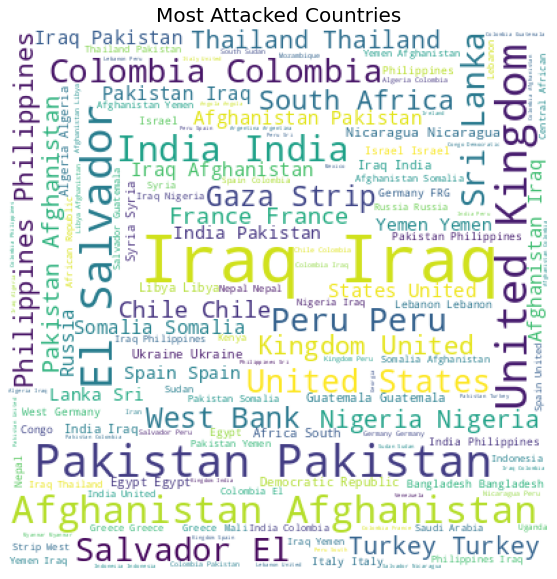

In [ ]:
#Creating wordcloud where countries displayed with biggest text have had the most attacks.
from wordcloud import WordCloud
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',width = 400,height = 400).generate(' '.join(df1['country']))
plt.title('Most Attacked Countries', fontsize = 20)
plt.axis('off')
plt.imshow(wordcloud)

WordCloud of top countries attacked by terrorists.


--------------------------------------------------------------------------------


###**Identifying Most Attacked Countries**

#### Chart - 1

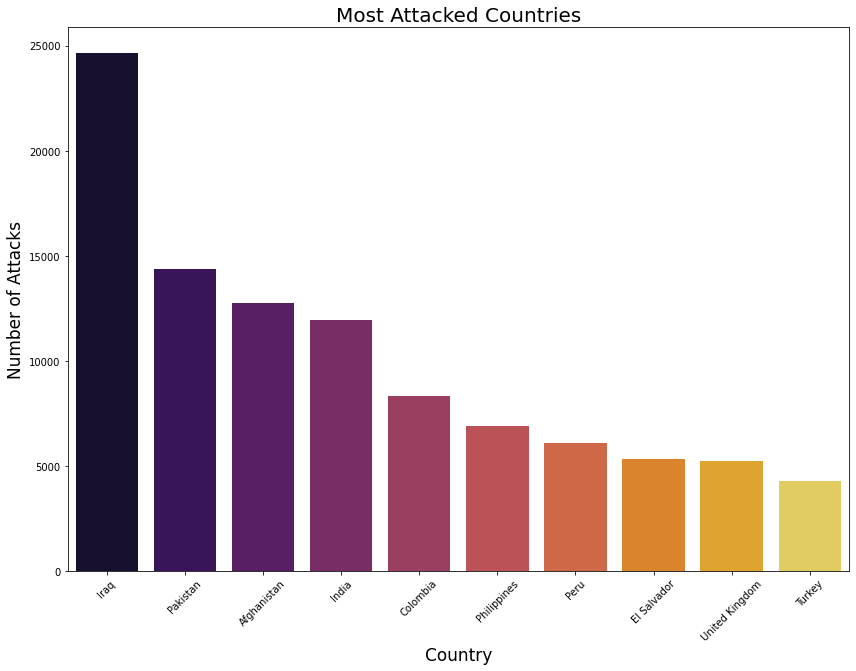

In [ ]:
# Chart - 1 visualization code
#creating function as shown below, counting the occurence of each country in the 'country' column
def most_attacked_countries():
  country=df1['country'].value_counts().head(10)
  plt.subplots(figsize=(14,10))
  #allocating x and y axis values
  plot1 = sns.barplot(x=country.index,y=country,palette='inferno')
  plot1.set_xlabel("Country",fontsize=17)
  plot1.set_ylabel("Number of Attacks",fontsize=17)
  plot1.set_title("Most Attacked Countries",fontsize=20)
  plt.xticks(rotation=45)
  plt.show()

most_attacked_countries()

##### 1. Why did you pick the specific chart?

This bar chart was chosen to identify the Top 10 Most attacked Countries.

##### 2. What is/are the insight(s) found from the chart?

* Iraq is the most attacked country with 24636 attacks.(found in the previous section)
* India is the fourth most attacked country with 11960 attacks.
* The top 4 attacked countries are Asian.



--------------------------------------------------------------------------------


###**Identifying Most Attacked City**
#### Chart - 2

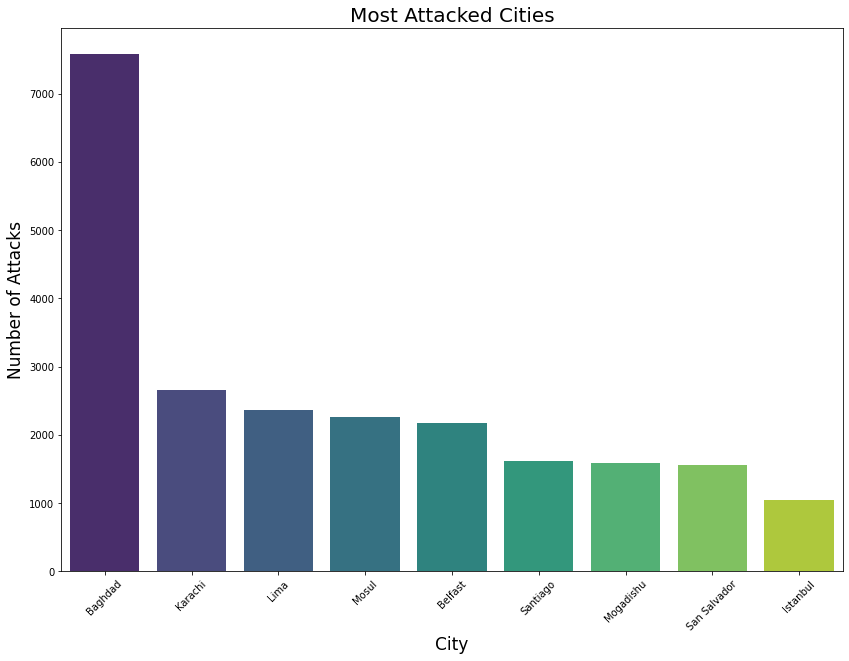

In [ ]:
# Chart - 2 visualization code
#creating function as shown below, counting the occurence of each city in the 'city' column
def most_attacked_cities():
  city=df1['city'].value_counts().head(10).drop(labels = ['Unknown'])
  plt.subplots(figsize=(14,10))
  #allocating x and y axis values
  plot1 = sns.barplot(x=city.index,y=city,palette='viridis')
  #setting x label, y label, title
  plot1.set_xlabel("City",fontsize=17)
  plot1.set_ylabel("Number of Attacks",fontsize=17)
  plot1.set_title("Most Attacked Cities",fontsize=20)
  plt.xticks(rotation=45)
  plt.show()

most_attacked_cities()


##### 1. Why did you pick the specific chart?

The above bar chart was chosen to identify the 10 most attacked Cities.

##### 2. What is/are the insight(s) found from the chart?


*   Baghdad, the capital of Iraq is the most attacked city, with 7589 attacks.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Identifying most attacked Cities and Countries could aid in reducing damages done,by increasing precautionary measures such as high security, weapon control, in these areas.




--------------------------------------------------------------------------------


####**The Most Dangerous Terrorist groups, in terms of most number of attacks.**
#### Chart - 3  

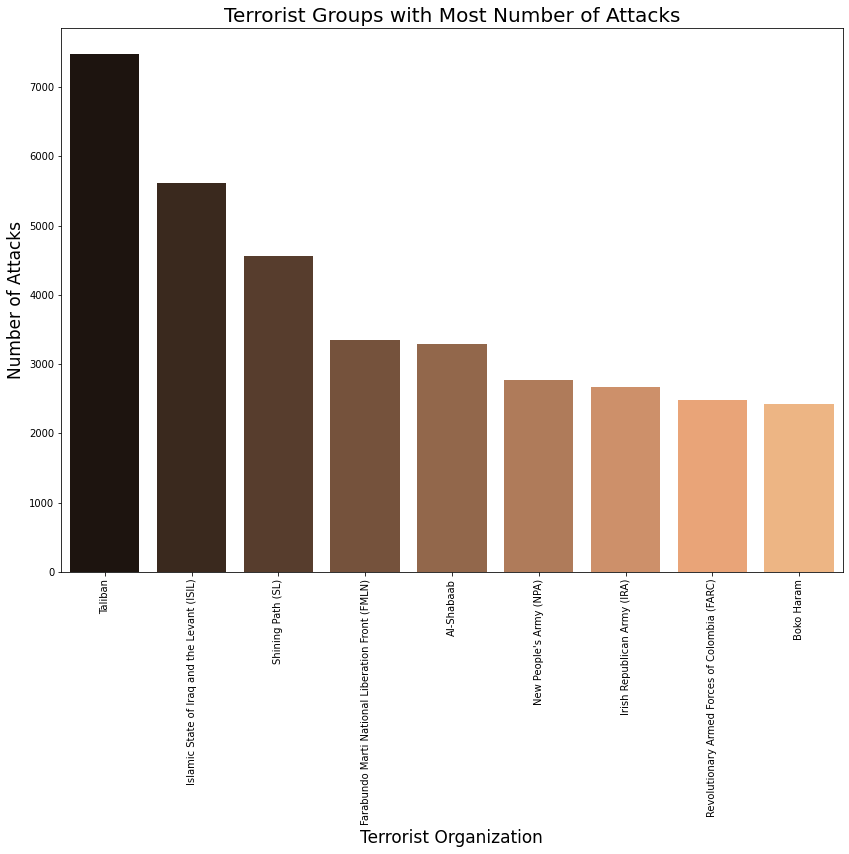

In [ ]:
# Chart - 133 visualization code
#creating function as shown below, counting the occurence of each terrorist group in the 'attacker' column
#we ignore unknown terror groups
def top_terror():
  top_attackers=df1['attacker'].value_counts().head(10).drop(labels = ['Unknown'])
  plt.subplots(figsize=(14,10))
  #allocating x and y axis values
  plot1 = sns.barplot(x=top_attackers.index,y=top_attackers,palette='copper')
  #setting x label, y label, title
  plot1.set_xlabel("Terrorist Organization",fontsize=17)
  plot1.set_ylabel("Number of Attacks",fontsize=17)
  plot1.set_title("Terrorist Groups with Most Number of Attacks",fontsize=20)
  plt.xticks(rotation=90)
  plt.show()

top_terror()


##### 1. Why did you pick the specific chart?

This bar chart was chosen to identify the top terrorist organizations in terms of number of attacks done.

##### 2. What is/are the insight(s) found from the chart?

*  Taliban, ISIL, Shining Path and FMLN are the top 4 terrorist groups.
*   Taliban made a total of 7478 attacks



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Identifying major terror groups could be the first step in preveting future attacks from them.





--------------------------------------------------------------------------------


####**Next we see the number of attacks each year.**

#### Chart - 4

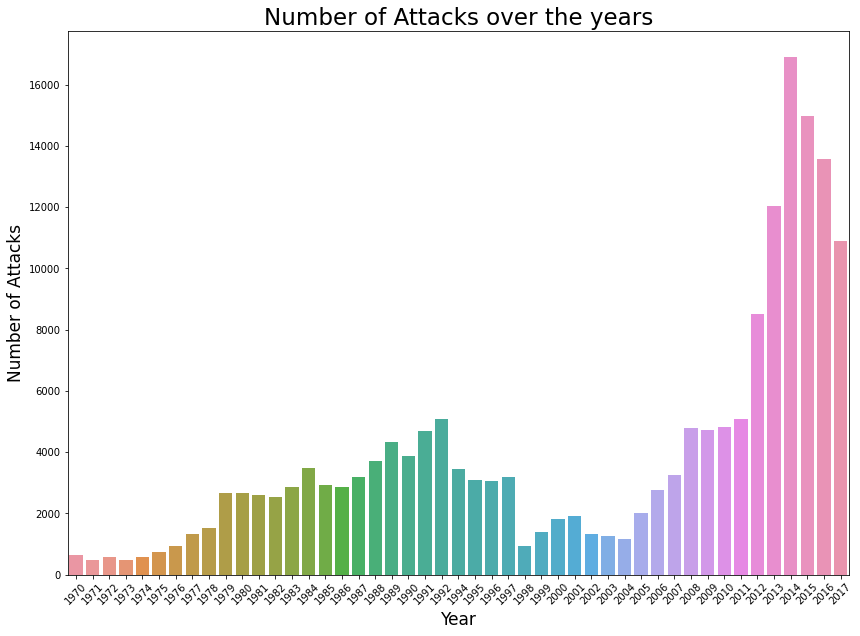

In [ ]:
# Chart - 4 visualization code
#We create the below function to find the occurence of each year in the dataframe using value_counts
def att_year():
  attacks_year=df1['year'].value_counts()
  plt.subplots(figsize=(14,10))
  #allocating x and y axis values
  plot1 = sns.barplot(x=attacks_year.index,y=attacks_year)
  #setting x label, y label, title
  plot1.set_xlabel("Year",fontsize=17)
  plot1.set_ylabel("Number of Attacks",fontsize=17)
  plot1.set_title("Number of Attacks over the years",fontsize=23)
  plt.xticks(rotation=45)
  plt.show()

att_year()

##### 1. Why did you pick the specific chart?

This chart was chosen to visualize the variation of number of attacks with the progress of years from 1970 to 2017.

##### 2. What is/are the insight(s) found from the chart?




*  Number of attacks per year has been increasing gradually from 1970.
*  A sudden dip in the number of attacks happens in 1998.
*  Drastic increase in number of attacks is noted since 2012.
* 2014 had the highest number of attacks.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Analysing what caused the dip in terror attacks in 1998 could help in recreating the scenario again, thereby bringing down number of attacks.







--------------------------------------------------------------------------------


####**Number of casualties each year**
#### Chart - 5


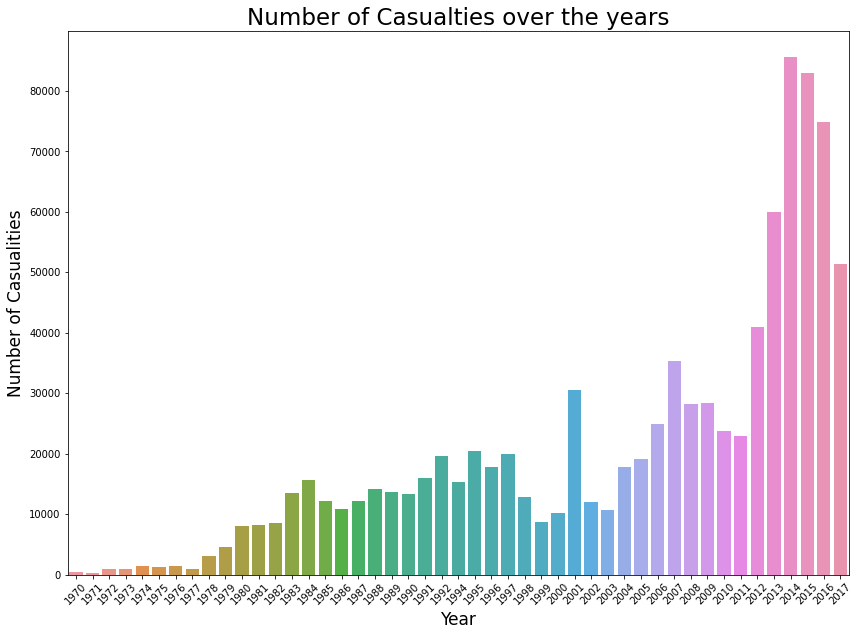

In [ ]:
#Creating function casuality which groups df1 by year first, then calculates the sum of casualities
def casuality():
  casualities_df=pd.DataFrame(df1.groupby('year').sum())
  plt.subplots(figsize=(14,10))
  #allocating x and y axis values
  plot1 = sns.barplot(x=casualities_df.index,y=casualities_df['casualities'])
  #setting x label, y label, title
  plot1.set_xlabel("Year",fontsize=17)
  plot1.set_ylabel("Number of Casualities",fontsize=17)
  plot1.set_title("Number of Casualties over the years",fontsize=23)
  plt.xticks(rotation=45)
  plt.show()

casuality()

Figuring out what caused the spike in number of casualties in 2001

In [ ]:
#Identifying why 2001 shows increased casualities compared to number of attacks from previous chart
df1[df1['casualities']==df1['casualities'].max()]




,year,month,day,region,country,city,type_of_attack,success,suicide,target,weapon,target_subtype,attacker,killed,wounded,casualities
73126,2001,9,11,North America,United States,New York City,Hijacking,1,1,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unnamed Civilian/Unspecified,Al-Qaida,1384,8190,9574
73127,2001,9,11,North America,United States,New York City,Hijacking,1,1,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unnamed Civilian/Unspecified,Al-Qaida,1383,8191,9574


Finding the exact number of casualties in the year 2014(highest bar) and 1971(lowest bar)

In [ ]:
#using max and min function to get highest and lowest number of casualities
print(df1.groupby('year')['casualities'].sum().max())
df1.groupby('year')['casualities'].sum().min()



85618


255

##### 1. Why did you pick the specific chart?
This chart was chosen to visualize the variation of casualties due to attacks with the progress of years from 1970 to 2017.

##### 2. What is/are the insight(s) found from the chart?
* It is identical to number of attacks variation in the previous sections except for 2001. The 9/11 attacks are the reason behind this spike in the year 2001.
* 9574 casualties were reported in the 9/11 attack.

*   2014 recorded the highest number of casualties(85618)

*   1971 recorded the  lowest of casualties(255)





--------------------------------------------------------------------------------


###**Now we try to figure out the most Lethal Terror Groups in terms of Number of Casualties and the number of attacks it took for them to reach that number of casualties**

###Chart-6

In [ ]:
#defining function to get casualities and attacks in single dataframe
def attacks_with_casuality():
  #we create the below dataframe to find the terrorist groups with top casualities
  top_casualities=pd.DataFrame(df1.groupby('attacker')['casualities'].sum().sort_values(ascending=False))
  #dropping unknown attackers
  top_casualities.drop(index=top_casualities.index[0], axis=0, inplace=True)
  #creating dataframe to identify number of attacks by each group
  top_attackers1=pd.DataFrame(df1['attacker'].value_counts().drop(labels = ['Unknown']) )
  top_attackers1.reset_index(inplace=True)
  top_attackers1.columns = ["attacker", "attacks"]
  #merging the above two dataframes to get the number of casualities and attacks on the same dataframe
  global top_attackers_c
  top_attackers_c=pd.merge(top_casualities, top_attackers1, on='attacker')
  top_attackers_c=top_attackers_c[top_attackers_c['casualities']>10000]
  top_attackers_c['casuality_ratio']=top_attackers_c['casualities']/top_attackers_c['attacks']
  top_attackers_c = top_attackers_c.astype({'casuality_ratio':'int'})
  #sorting by highest to lowest casualities
  top_attackers_c.sort_values(by='casualities',ascending=False,inplace=True)
attacks_with_casuality()
top_attackers_c

,attacker,casualities,attacks,casuality_ratio
0,Islamic State of Iraq and the Levant (ISIL),69595,5613,12
1,Taliban,57342,7478,7
2,Boko Haram,29800,2418,12
3,Al-Qaida,28372,74,383
4,Liberation Tigers of Tamil Eelam (LTTE),22020,1606,13
5,Al-Shabaab,16954,3288,5
6,Tehrik-i-Taliban Pakistan (TTP),15574,1351,11
7,Al-Qaida in Iraq,14724,638,23
8,Shining Path (SL),14632,4555,3
9,Farabundo Marti National Liberation Front (FMLN),12130,3351,3


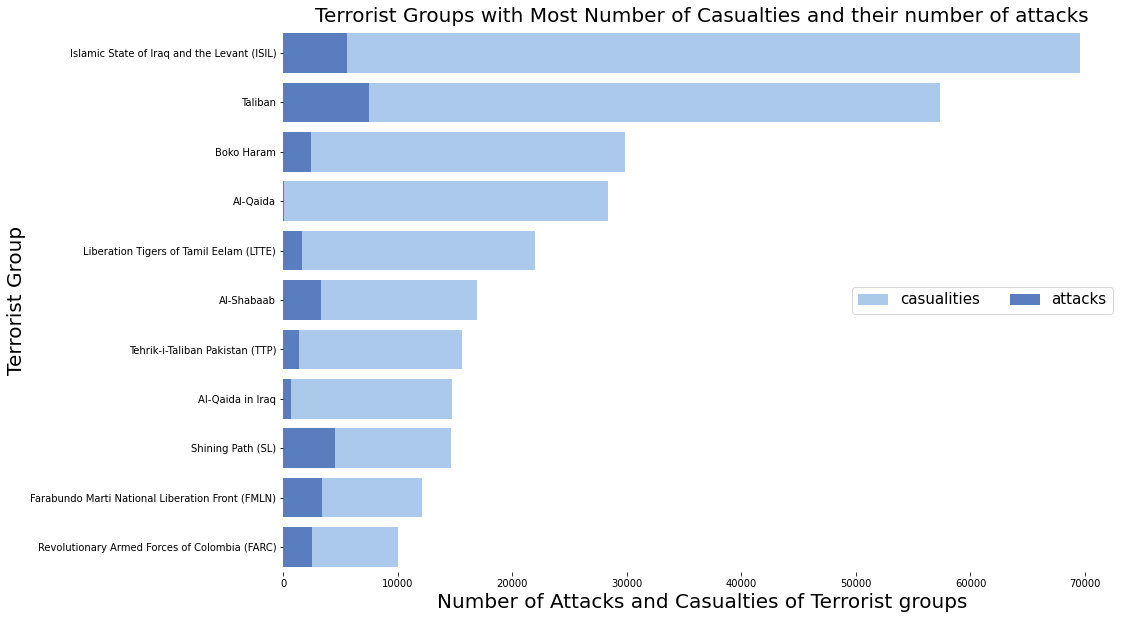

In [ ]:
#Plotting bar graph
f,ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
#setting x, y axis with x axis as number of attacks
sns.barplot(x="casualities", y="attacker", data=top_attackers_c,label="casualities", color="b")
sns.set_color_codes("muted")
#setting x, y axis with x axis as number of casualities
sns.barplot(x="attacks", y="attacker", data=top_attackers_c, label="attacks", color="b")
# Adding legend
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=15)
ax.set( ylabel="Terrorist Group", xlabel="Number of Attacks and Casualties of Terrorist groups",title="Terrorist Groups with Most Number of Casualties and their number of attacks")
for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
                 item.set_fontsize(20)
sns.despine(left=True, bottom=True)

##### 1. Why did you pick the specific chart?

* Using the above chart, we identify the top 10 terrorist groups with most number of casualties
* We use a stacked bar chart to identify the number of attacks it took for the terrorist group which led to the number of casualties



##### 2. What is/are the insight(s) found from the chart?


*  Though the Taliban has the most number of attacks, ISIL has the most number of casualties.
*  We define a term called casualties ratio which denotes the average number of casualties per attack. From the graph we identify Al-Qaida's number of attacks is extremely small, but the number of casualties is significantly large.Thus Al-Qaida is a lethal terrorist group which has carried out mass killings in its attacks.
*Al-Qaida has a casualty ratio of 383, which means 383 kills per attack.Next on the list is LTTE with 13 kills per attack.




--------------------------------------------------------------------------------


###**Terrorist Attacks across different regions through the years**

###Chart-7

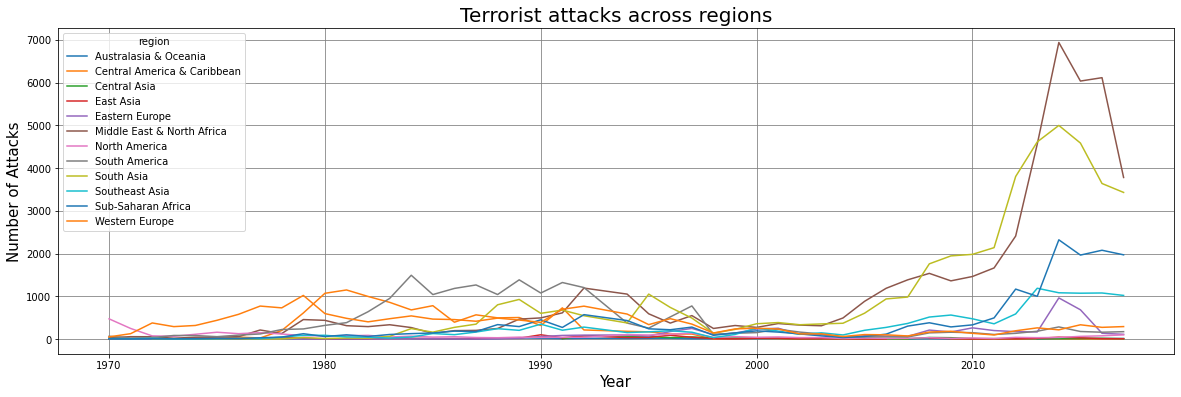

In [ ]:
# Chart - 7 visualization code
#defining function below to group dataframe by years, regions
def terr_region():
  global attacks_year
  attacks_year = df1.groupby(['year', 'region']).count().unstack()['country']
  attacks_year.plot(kind='line', figsize=(20,6)).patch.set_facecolor('white')
  plt.grid(color='grey')
  plt.title('Terrorist attacks across regions', fontsize = 20)
  plt.ylabel('Number of Attacks', fontsize = 15)
  plt.xlabel('Year', fontsize = 15)
terr_region()

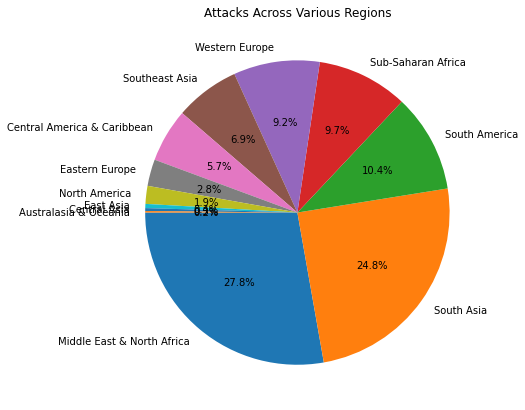

In [ ]:
#Defining pie chart to find the percentage of attacks in different regions
def attack_per():
  attacks_regions = df1['region'].value_counts()
  fig = plt.figure(figsize =(7, 7))
  plt.pie(attacks_regions,labels=list(attacks_regions.index),autopct='%1.1f%%',startangle=180)
  plt.title('Attacks Across Various Regions')
  plt.show()
attack_per()

##### 1. Why did you pick the specific chart?




*  Line plot of number of terrorist attacks across different regions represented with different colours is visualized to demonstrate the variation of number of attacks through the years for each particular reagion seperately.
*  Pie Chart of distrubtion of attacks across various regions is visualised.



##### 2. What is/are the insight(s) found from the chart?


1.   Middle East and North Africa region has seen the highest spike in terrorsist attacks since 2010
2.  East Asia, Central Asia appears to consistently have lower number of attacks compared to other regions.
3. From the pie chart it is understood that 27.8% of all attacks have happened in Middle East and North Africa


--------------------------------------------------------------------------------


#### **Identifying the Targets that have been attacked the most.**
#### Chart - 8

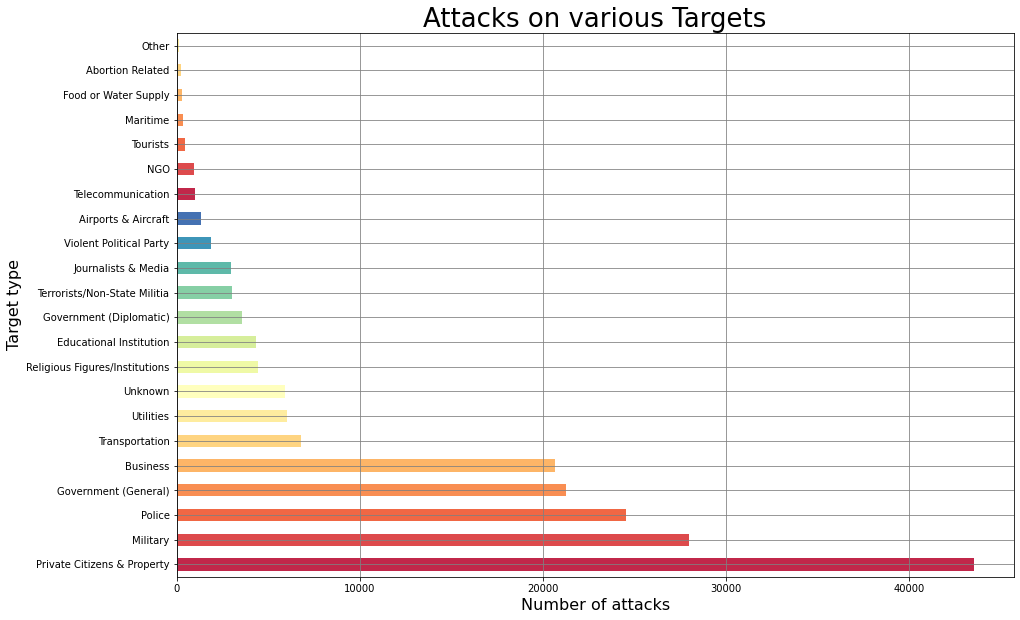

In [ ]:

#defining function for creating a bar graph to depict number of attacks on different target types
def top_targets():
  targets = df1['target'].value_counts()
  palette = sns.color_palette("Spectral", 15).as_hex()
  targets.plot(kind = 'barh',figsize=(15,10), color = palette , grid = True).patch.set_facecolor('white')
  plt.grid(color='grey', linestyle='-')
  plt.title('Attacks on various Targets', fontsize = 26)
  plt.xlabel('Number of attacks', fontsize = 16)
  plt.ylabel('Target type', fontsize = 16)

top_targets()

##### 1. Why did you pick the specific chart?

This horizontal Bar graph shows the type of targets affected the most due to terror attacks.


##### 2. What is/are the insight(s) found from the chart?



*   Private Citizens and property have been the most affected, followed by Military and Police as the second and third most affected respectively.




In [ ]:
df1.target.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Private Citizens & Property       23.9%
Military                          15.4%
Police                            13.5%
Government (General)              11.7%
Business                          11.4%
Transportation                     3.7%
Utilities                          3.3%
Unknown                            3.2%
Religious Figures/Institutions     2.4%
Educational Institution            2.4%
Government (Diplomatic)            2.0%
Terrorists/Non-State Militia       1.7%
Journalists & Media                1.6%
Violent Political Party            1.0%
Airports & Aircraft                0.7%
Telecommunication                  0.6%
NGO                                0.5%
Tourists                           0.2%
Maritime                           0.2%
Food or Water Supply               0.2%
Abortion Related                   0.1%
Other                              0.1%
Name: target, dtype: object

* 23.9% of all attacks have been on Private Citizens and Property.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   Increased security to civilians is required.




--------------------------------------------------------------------------------


####**Considering the frequency of mass shootings in schools in recent times, we take a look at the number of attacks in Educational Institutions over the years**

#### Chart - 9

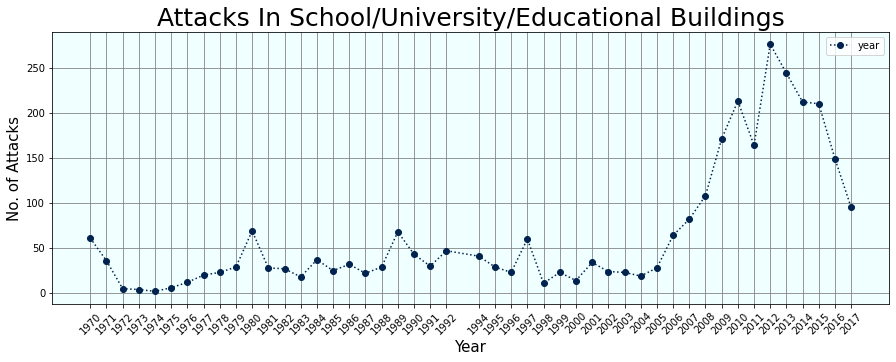

In [ ]:
#defining function to plot line chart of number of education building related attacks over the years
def edu_attack():
#counting number of incidents related to educational institutions using value_counts
  df1[df1['target_subtype']=='School/University/Educational Building']['year'].value_counts().sort_index().plot(kind = 'line', marker = 'o', ls = ':', grid = True, colormap = "cividis", figsize=(15,5)).patch.set_facecolor('#f0ffff')
  plt.grid(color='grey', linestyle='-')
  plt.title('Attacks In School/University/Educational Buildings', fontsize = 25)
  #plotting x, y labels.
  plt.ylabel('No. of Attacks', fontsize = 15)
  plt.xlabel('Year', fontsize = 15)
  plt.xticks(df1[df1['target_subtype']=='School/University/Educational Building']['year'].value_counts().sort_index().index)
  plt.xticks(rotation=45)
  plt.legend()

edu_attack()

In [ ]:
#finding number of attacks in 2012
schools=df1[df1['target_subtype']=='School/University/Educational Building']
schools=schools[schools['year']==2012]
schools['year'].value_counts()


2012    276
Name: year, dtype: int64

##### 1. Why did you pick the specific chart?

This line chart was chosen to visualize the number of terrorist incidents in educational institutions over the years.

##### 2. What is/are the insight(s) found from the chart?


1.  Number of attacks increased after 2006
2.  2012 was the year with most number of terrorist incidents in educational institutions. (276)



--------------------------------------------------------------------------------


#### **We compare the number of Successful attacks to failed attacks across different regions**


#### Chart - 10

<Figure size 1440x360 with 0 Axes>

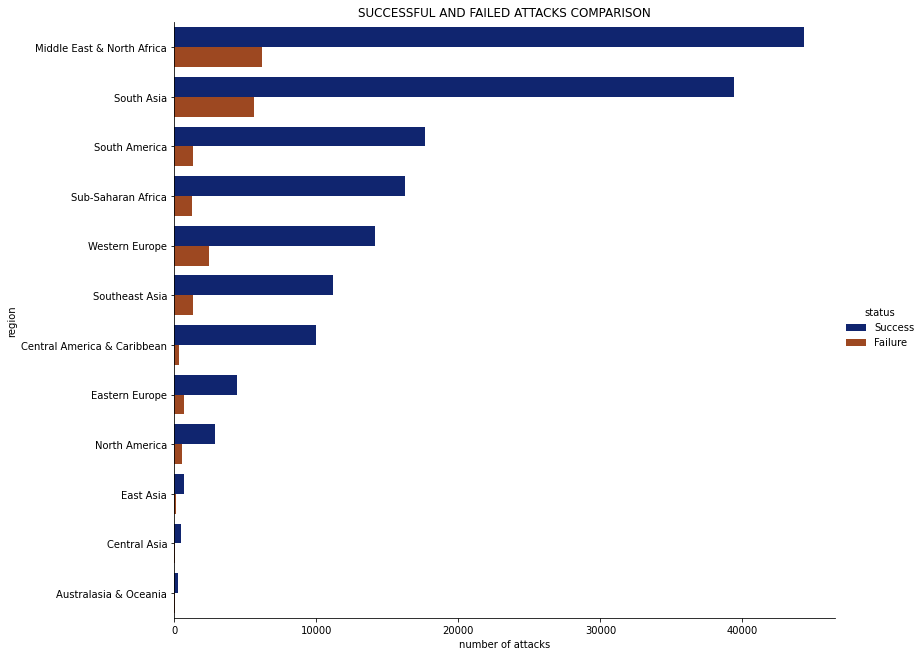

In [ ]:
#creating function to show horizontal bar graph of number of successful, failed terror attacks across regions.
def sf():
  #Creating sub dataframe df6 with sucess failure information
  df6=df[['region_txt','success']]
  df6=pd.DataFrame(df6.value_counts().reset_index())
  df6.columns = ["region", "status", "count"]
  #replacing 0 and 1 with failure and success
  df6['status'] = df6['status'].replace([0,1], ['Failure', 'Success'])
  plt.figure(figsize=(20,5))
  g = sns.catplot(data=df6, kind="bar", x="count", y="region", hue="status",  palette="dark",height=9, aspect=12/9)
  g.set(xlabel='number of attacks', ylabel='region',title='SUCCESSFUL AND FAILED ATTACKS COMPARISON')

sf()




##### 1. Why did you pick the specific chart?

To compare the number of successful attacks and failed attacks side by side, this barplot was chosen. Comparison of this kind can give insights about regions handling the terror attacks successfuly.

##### 2. What is/are the insight(s) found from the chart?



*   The general trend observed here is that the number of failed attacks is less than a quarter of the number of successful attacks in highly attacked regions
*   Central America and Carribbean region have a very low number of failed attacks to successful attacks.



--------------------------------------------------------------------------------


#### **Continuing from the previous section , we visualize the success percentage of terror attacks across different regions**
#### Chart - 11

In [ ]:
#creating function to get success percentage and failure percentage dataframe
def sf2():
  #Creating sub dataframe df7 with success failure information
  df7=df[['region_txt','success']]
  df7=pd.DataFrame(df7.value_counts().reset_index())
  df7.columns = ["region", "success", "count"]

  #counting all success values to a seperate df
  sucessful=pd.DataFrame(df7[df7['success']==1])
  sucessful.drop(['success'], axis=1,inplace=True)
  sucessful = sucessful.rename(columns={'count': 'success'})

  #counting all failure values to a seperate df
  failure=pd.DataFrame(df7[df7['success']==0])
  failure.drop(['success'], axis=1,inplace=True)
  failure = failure.rename(columns={'count': 'failure'})

  #merging two dataframes to get sucess and failure attack counts on each region
  global success_fail
  success_fail = pd.merge(sucessful, failure, on ='region')
  success_fail['total']=(success_fail['success']+success_fail['failure'])
  success_fail['fail_percent']=(success_fail['failure']/success_fail['total'])*100
  success_fail['success_percent']=(success_fail['success']/success_fail['total'])*100
  success_fail=success_fail.sort_values(by=['success_percent'],ascending=False)
  return success_fail.head(12)

sf2()


,region,success,failure,total,fail_percent,success_percent
6,Central America & Caribbean,9979,365,10344,3.528616,96.471384
2,South America,17620,1358,18978,7.155654,92.844346
3,Sub-Saharan Africa,16277,1273,17550,7.253561,92.746439
10,Central Asia,505,58,563,10.301954,89.698046
5,Southeast Asia,11151,1334,12485,10.684822,89.315178
0,Middle East & North Africa,44319,6155,50474,12.194397,87.805603
1,South Asia,39369,5605,44974,12.462756,87.537244
7,Eastern Europe,4437,707,5144,13.744168,86.255832
4,Western Europe,14161,2478,16639,14.892722,85.107278
11,Australasia & Oceania,240,42,282,14.893617,85.106383


<Figure size 1440x360 with 0 Axes>

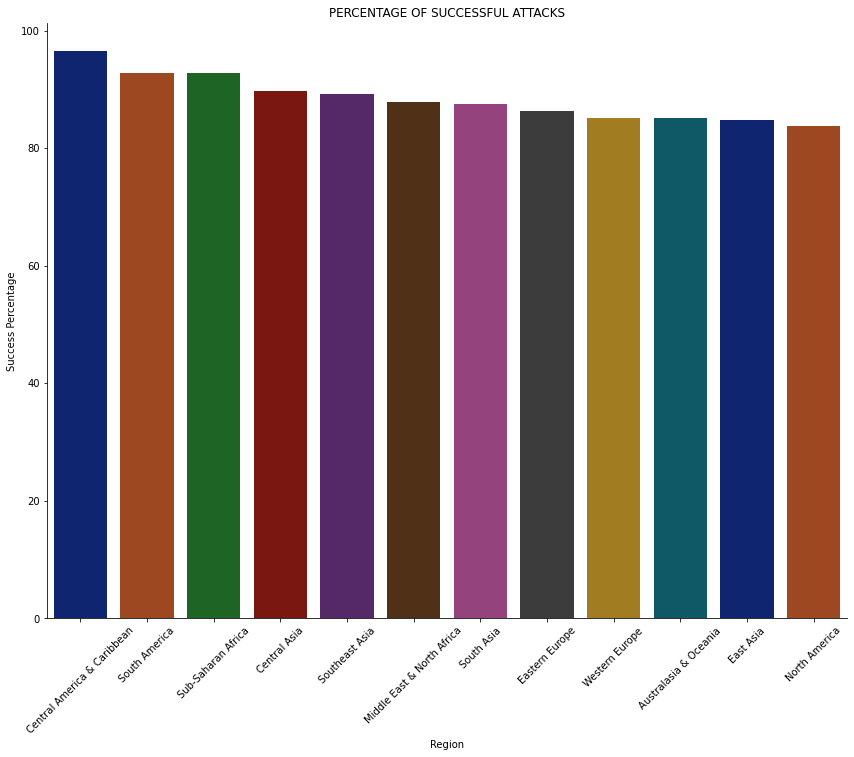

In [ ]:
#plotting bar chart of success percentage of terror attacks across different regions
plt.figure(figsize=(20,5))
g = sns.catplot(data=success_fail, kind="bar", x="region", y="success_percent",  palette="dark",height=9, aspect=12/9)
g.set(xlabel='Region', ylabel='Success Percentage',title='PERCENTAGE OF SUCCESSFUL ATTACKS')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

The above bar plot was chosen to visualize the success percentage of terrorist attacks across different regions.

##### 2. What is/are the insight(s) found from the chart?



*   Central America and Caribbean region has the highest percentage of successful terrorist attacks.(96.4%)
*   North America has the lowest percentage of successful terror attacks.(83.7%)
* Considering regions with more than 10000 terror attacks. Western Europe has a lowest percentage of successful terror attacks.(85.1%)



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.





Analyzing Western Europe's countermeasures to terror attacks could be the answer to bringing down successful attack percentage in heavily attacked regions.

Our Assumption has turned out to be true.

--------------------------------------------------------------------------------


###**We take a look at the Most used weapons by Terrorist groups worldwide**

#### Chart - 11


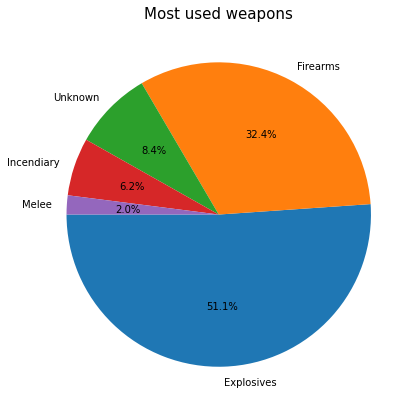

In [ ]:
#Creating function to form a pie chart of the most used weapons
def most_used_weapons():

  attacks_regions = df1['weapon'].value_counts().head(5)
  fig = plt.figure(figsize =(7, 7))
  plt.pie(attacks_regions,labels=list(attacks_regions.index),autopct='%1.1f%%',startangle=180)
  plt.title('Most used weapons',fontsize=15)
  plt.show()

most_used_weapons()

##### 1. Why did you pick the specific chart?

This pie chart was chosen to visualize the weapon usage of the attackers.

##### 2. What is/are the insight(s) found from the chart?


1.   51.5% of all terrorist attacks are done using explosives.

2.  32.4% attacks are done using firearms



 ##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Identifying Raw Materials for the manufacture of explosives and restricting its usage could help reduce attacks done using explosives.



####**We have identified the top terrorist organizations in Chart 3.Now we identify the weapon preferences of these organizations.**
#### Chart - 12


In [ ]:
#Function to display pie chart of a particular category
class Chart:
  def __init__(self):
    pass
  def top4xofy(self,str1,str2,str3,str4):
    try:
      a=df1[df1[str1]==str2][str3].value_counts()
      a=a.iloc[:4]
      fig = plt.figure(figsize =(5, 5))
      plt.pie(a,labels=list(a.index),autopct='%1.1f%%',startangle=180,explode=(0.1, 0.1, 0.2, 0.3))
      plt.title(str4)
      plt.show()
    except:
      a=df1[df1[str1]==str2][str3].value_counts()
      a=a.iloc[:4]
      fig = plt.figure(figsize =(7, 7))
      plt.pie(a,labels=list(a.index),autopct='%1.1f%%',startangle=180)
      plt.title(str4)
      plt.show()


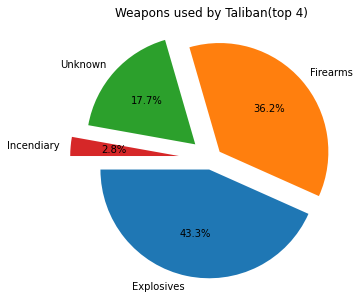

In [ ]:
obj=Chart()
obj.top4xofy('attacker','Taliban','weapon','Weapons used by Taliban(top 4)')



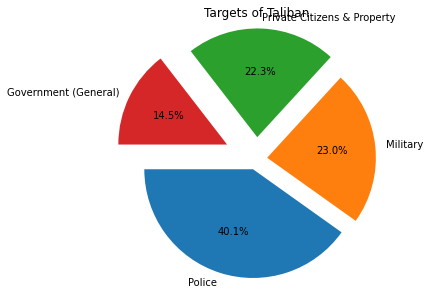

In [ ]:
obj.top4xofy('attacker','Taliban','target','Targets of Taliban')




##### 1. Why did you pick the specific chart?

This pie chart was chosen to identify the top four weapons used by Taliban and their top 4 targets.


##### 2. What is/are the insight(s) found from the chart?

* Taliban prefers the use of explosives the most, followed by firearms.
*They target Police the most.


#### Chart - 13

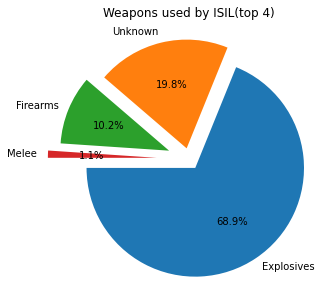

In [ ]:
obj.top4xofy('attacker','Islamic State of Iraq and the Levant (ISIL)','weapon','Weapons used by ISIL(top 4)')


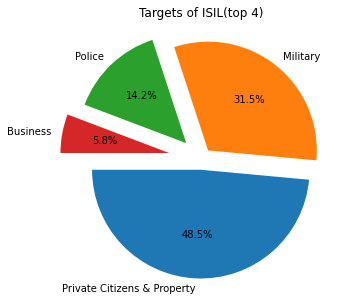

In [ ]:
obj.top4xofy('attacker','Islamic State of Iraq and the Levant (ISIL)','target','Targets of ISIL(top 4)')


##### 1. Why did you pick the specific chart?

This pie chart was chosen to identify the top four weapons used by ISIL and their top 4 targets.

##### 2. What is/are the insight(s) found from the chart?

* ISIL uses explosives the most.
* They target Private Citizens and Property the most.


#### Chart - 14

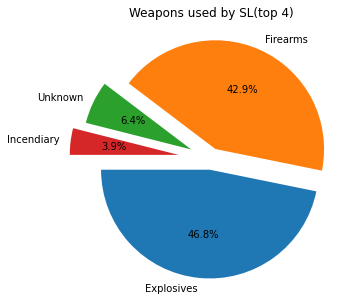

In [ ]:
obj.top4xofy('attacker','Shining Path (SL)','weapon','Weapons used by SL(top 4)')


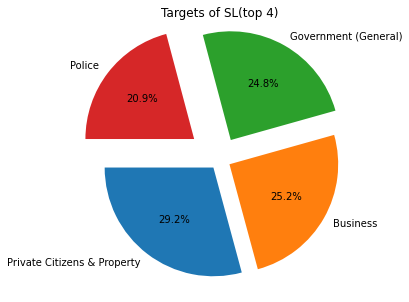

In [ ]:
obj.top4xofy('attacker','Shining Path (SL)','target','Targets of SL(top 4)')


##### 1. Why did you pick the specific chart?

This pie chart was chosen to identify the top four weapons used by ISIL and their top 4 targets.

##### 2. What is/are the insight(s) found from the chart?




* Out of all the other Top terrorist groups, SL uses explosives and firearms almost equally.
* SL targets Police, Government, Military and Citizens almost equally.


#### Chart - 15

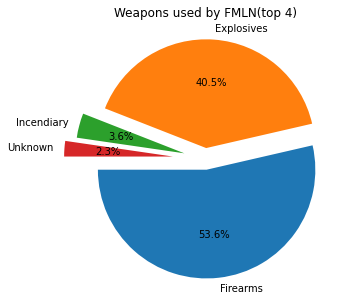

In [ ]:
# Chart - 5 visualization code
obj.top4xofy('attacker','Farabundo Marti National Liberation Front (FMLN)','weapon','Weapons used by FMLN(top 4)')

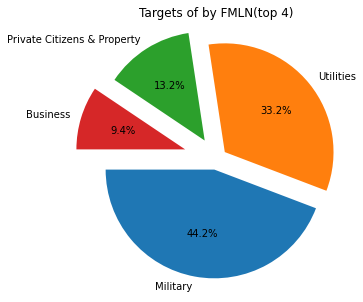

In [ ]:
obj.top4xofy('attacker','Farabundo Marti National Liberation Front (FMLN)','target','Targets of by FMLN(top 4)')

##### 1. Why did you pick the specific chart?

This pie chart was chosen to identify the top four weapons used by FMLN and their top 4 targets.

##### 2. What is/are the insight(s) found from the chart?

* FMLN uses firearms in the majority of their attacks, their second preference is
explosives.
* Military is their top target.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above 4 pie charts, we can observe that all 4 of the organizations use firearms and explosives the most, restricting access to these weapons could be the first step in slowing down their attacks.

--------------------------------------------------------------------------------


#### Chart - 14 - Correlation Heatmap

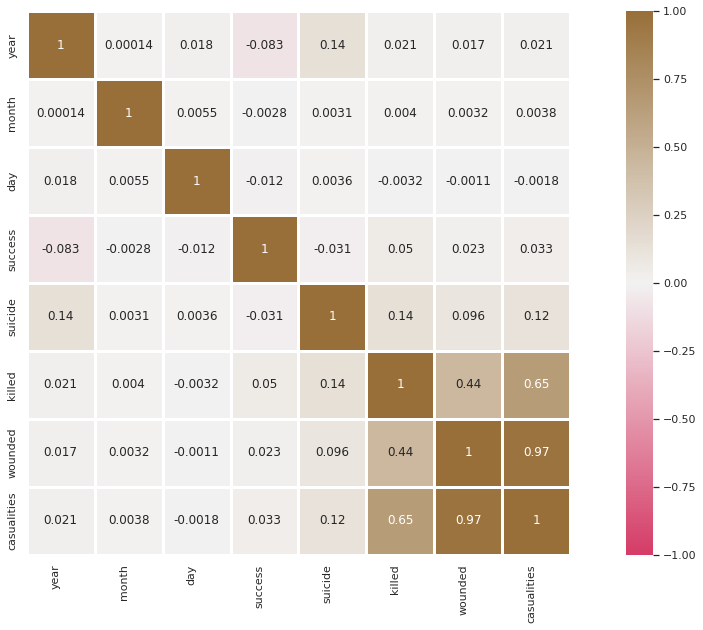

In [ ]:
#Relation between each column with every other column can be visualised using correlation heatmap
corr = df1.corr()
hm = sns.heatmap(corr, vmin=-1, vmax=1, center=0,annot = True,robust = False, linewidth = 3,cmap=sns.diverging_palette(1, 50, as_cmap = True),
    square=True)
hm.set_xticklabels(hm.get_xticklabels(),rotation=90, horizontalalignment='right');
sns.set(rc = {'figure.figsize':(20,10)})

##### 1. Why did you pick the specific chart?

Heat map is used to visualize the relation between different columns. 1 indicates maximum corelation.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that only killed, wounded and casualties are related which is obvious considering that all 3 columns represent the same category, that is, damage done to people.

--------------------------------------------------------------------------------


#### Chart - 15 - Pair Plot

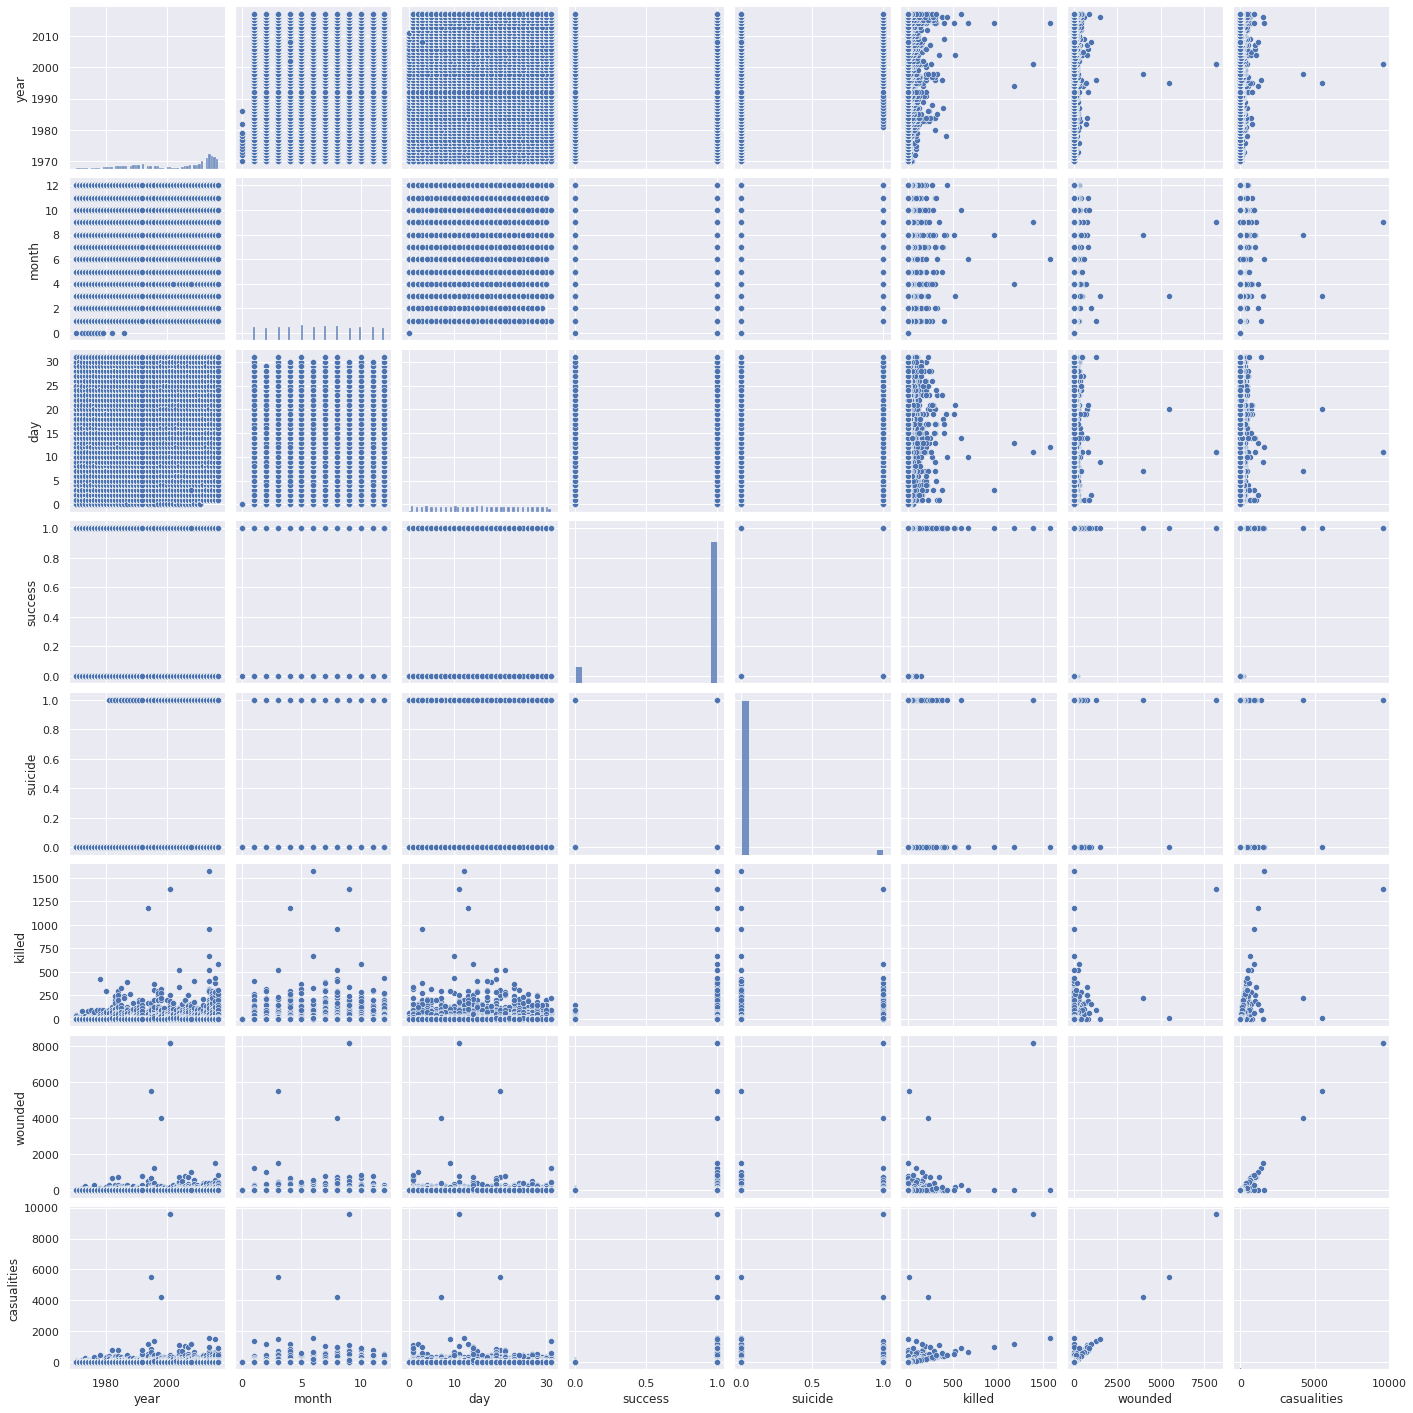

In [ ]:
# Pair Plot visualization code
figsize=(15, 10)
sns.pairplot(df1, diag_kind="hist")


##### 1. Why did you pick the specific chart?

Relationship between pairs of numerical columns of out dataset is seen using the pairlpot

##### 2. What is/are the insight(s) found from the chart?

One observation made is that attacks happen uniformly across all months and day values and there isn't a particular month or day that is more prone to attacks.

--------------------------------------------------------------------------------


# **Insights from our analysis**

From our analysis of the Global Terrorism Dataset, we have gained the following insights.
* Iraq is the most attacked country with 24636 attacks
*   Baghdad, the capital of Iraq is the most attacked city, with 7589 attacks.
*  Phillipines is the country with the most number of ransom attacks which succeeded.
*   $275000000 was the highest ransom paid in a ransom attack. Al-Basiyah
*   India is the country with the most kidnapping operations. 7515 people kidnapped.

*   Taliban is the terrorist group with Most number of Attacks.
*   Bombs and Explosives are the most used method of attack for terrorists
*   Unclaimed attacks result in more casualties compared to claimed attacks
*   95.9 percent of Student Radicals are from the US and 73 percent of the attacks happened in 1970
*  Drastic increase in number of attacks is noted since 2012.
* 2014 had the highest number of attacks.

*  Taliban, ISIL, Shining Path and FMLN are the top 4 terrorist groups.
* 2014 recorded the highest number of casualties(85618)
* Al-Qaida has a casualty ratio of 383, which means 383 kills per attack.Next on the list is LTTE with 13 kills per attack.
* 27.8% of all attacks have happened in Middle East and North Africa

*   Private Citizens and property have been the most affected, followed by Military and Police as the second and third most affected respectively. 23.9% of all attacks have been on Private Citizens and Property.
* Number of attacks in educational institutions have  been increasing since  2006.2012 was the year with most number of terrorist incidents in educational institutions. (276)
*Central America and Carribbean region have a very low number of failed attacks to successful attacks.
We can observe that around 96 percent of attacks in Central America and Carribbean region turn out successful.
In regions with more than 10000 attacks, Western Europe appears to have more number of failed attacks compared to successful attacks
*North America has the lowest percentage of successful terror attacks.(83.7%)
*50.9% of all terrorist attacks are done using explosives. 32.2% attacks are done using firearms
*We observe that all 4 of the top terror organizations use firearms and explosives the most, restricting access to these weapons could be the first step in slowing down their attacks.

## **5. Conclusion / How  could we reduce attacks in future?**

* Identifying most attacked Cities and Countries could aid in reducing damages done,by increasing precautionary measures such as high security, weapon control, in these areas.

* Restricting raw material for the production of explosives and strict gun Laws could bring down a large number of attacks since bombing is the most used attack type.

* Western Europe has the lowest percentage of success of terror attacks(among areas with more than 10000 attacks)(85.1%) In other words, terror attacks fail the most in Western Europe. Analyzing Western Europe's countermeasures to terror attacks could be the answer to bringing down successful attack percentage in heavily attacked regions.
* A dip in terror attacks is seen in 1998.  Analysing what caused the dip in terror attacks in 1998 could help in recreating the scenario again, thereby bringing down number of attacks.

* Availability of efficient emergency medical services in highly attacked areas could help in bringing down the death toll due to terrorist attacks.



--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
